# Visualization

In [55]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as animation
from celluloid import Camera

with open('HCP_movie_watching.pkl','rb') as f:
    TS = pickle.load(f)
print(TS.keys())


dict_keys(['testretest', 'twomen', 'bridgeville', 'pockets', 'overcome', 'inception', 'socialnet', 'oceans', 'flower', 'hotel', 'garden', 'dreary', 'homealone', 'brokovich', 'starwars'])


C:\Users\Anna&Megan\AppData\Local\Temp\ipykernel_14680\2450370645.py:6: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace = 0.5, hspace = 0.5)


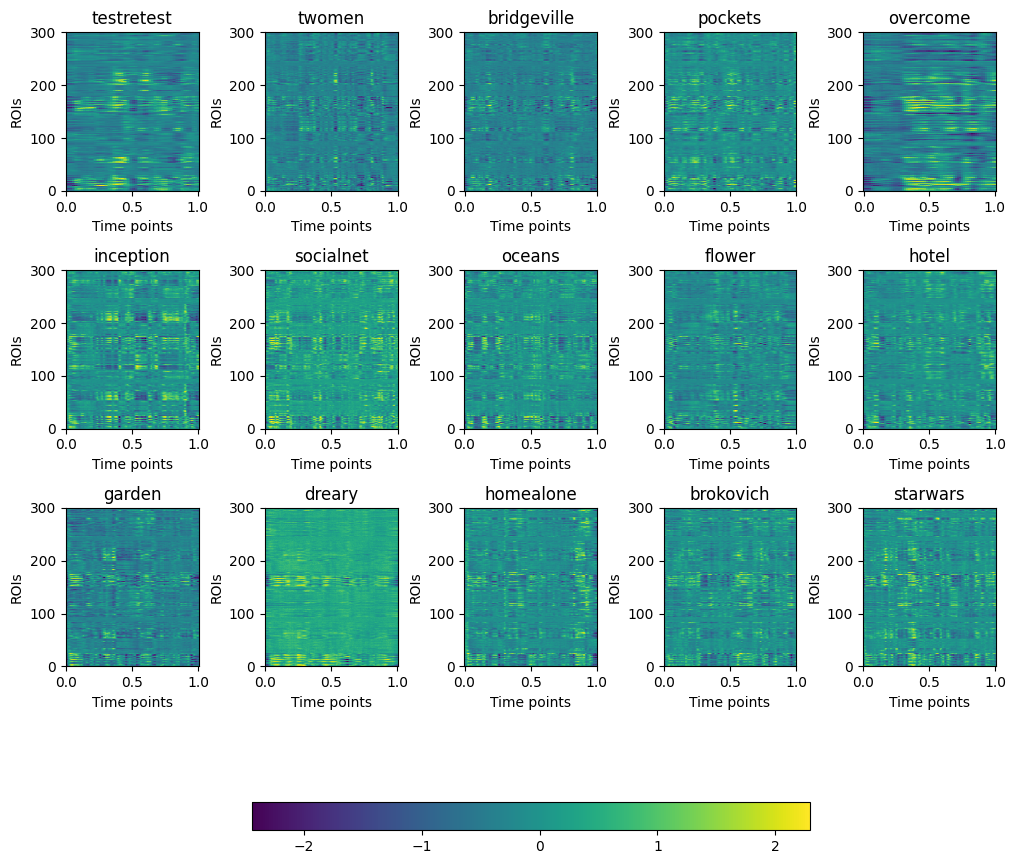

In [56]:
r = np.array([i for i in range(300)])

fig, axs = plt.subplots(nrows = 3, ncols = 5, constrained_layout = True)
fig.set_size_inches(12,12)
fig.set_dpi(100)
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

i = 0
for movie_name, ts in TS.items():
    if movie_name == "testretest":
        avgmData = np.mean(ts, axis = (0,1))
    else:
        avgmData = np.mean(ts, axis = 0)
    avgmData = avgmData.T
    numTime = avgmData.shape[1]

    t = np.array([i for i in range(numTime)])
    t = (t - t.min()) / (t.max() - t.min())
    
    ax = axs[int(i / 5)][int(i % 5)]
    # fig, axs = plt.subplots()
    im = ax.pcolormesh(t, r, avgmData, shading='nearest')
    ax.set_ylabel("ROIs")
    ax.set_ylim(0, avgmData.shape[0])
    ax.set_xlabel("Time points")
    # ax.set_xlim(-2, 2)
    ax.set_title(movie_name)
    i += 1
    
cbar = fig.colorbar(im, ax=axs, shrink=0.6, location='bottom')




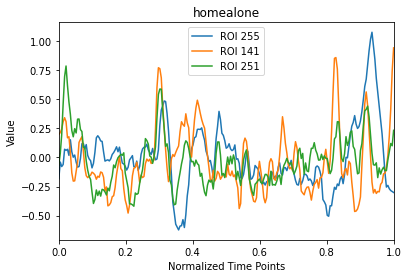

In [65]:
def timeSeries(val, seed):
    if len(val.shape) == 4:
        avgmData = np.mean(val, axis = (0,1))
    else:
        avgmData = np.mean(val, axis = 0)
    avgmData = avgmData.T

    rng = np.random.default_rng(seed)
    roiIndex = rng.integers(300)

    tSeries = avgmData[roiIndex, :]

    t = np.array([i for i in range(avgmData.shape[1])])
    t = (t - t.min()) / (t.max() - t.min())
    return t, tSeries, roiIndex

movie = 'homealone'
mArr = TS.get(movie)

fig, axs = plt.subplots()
for i in range(3):
    t, tSeries, rIndex = timeSeries(mArr, i)
    axs.plot(t, tSeries, label='ROI ' + str(rIndex))
axs.set_xlabel("Normalized Time Points")
axs.set_xlim(0, 1)
axs.set_ylabel("Value")
axs.set_title(movie)
plt.legend()

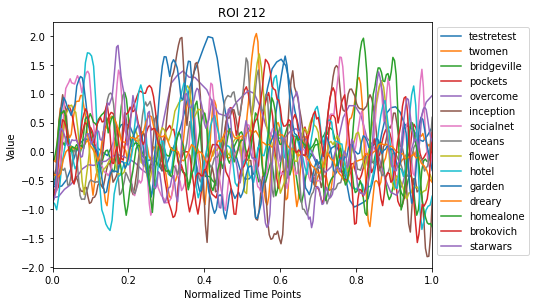

In [64]:
fig, axs = plt.subplots()
fig.tight_layout()
seed = 2022
for movie in TS.keys():
    mArr = TS.get(movie)
    t, tSeries, rIndex = timeSeries(mArr, seed)
    axs.plot(t, tSeries, label=movie)
plt.xlabel("Normalized Time Points")
plt.xlim(0, 1)
plt.ylabel("Value")
plt.title("ROI " + str(rIndex))
plt.legend(bbox_to_anchor=(1, 1))

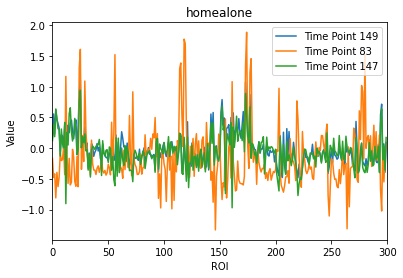

In [61]:
%matplotlib inline
def roi(val, index):
    if len(val.shape) == 4:
        avgmData = np.mean(val, axis = (0,1))
    else:
        avgmData = np.mean(val, axis = 0)

    roiSeries = avgmData[index, :]

    r = [i for i in range(avgmData.shape[1])]
    return r, roiSeries

movie = 'homealone'
mArr = TS.get(movie)

fig, axs = plt.subplots()
for i in range(3):
    rng = np.random.default_rng(i)
    tIndex = rng.integers(mArr.shape[0])
    r, roiSeries = roi(mArr, tIndex)
    axs.plot(r, roiSeries, label='Time Point ' + str(tIndex))
axs.set_xlabel("ROI")
axs.set_xlim(0, len(r))
axs.set_ylabel("Value")
axs.set_title(movie)
plt.legend()

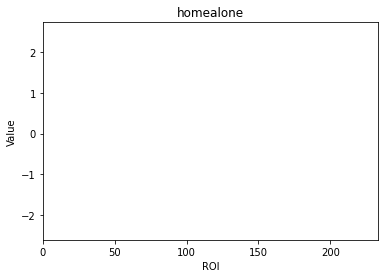

In [75]:
# Resource:
# https://medium.datadriveninvestor.com/how-to-create-animation-using-matplotlib-and-celluloid-70533ba013e8

fig, axs = plt.subplots()
axs.set_xlabel("ROI")
axs.set_xlim(0, mArr.shape[1])
axs.set_ylabel("Value")
axs.set_title(movie)

cam = Camera(fig)

for i in range(mArr.shape[0]):
    r, roiSeries = roi(mArr, i)
    plt.plot(r, roiSeries, c='royalblue')
    cam.snap()

anim = cam.animate(blit=True, interval=20)
# anim.save("homealone_vid.mp4",writer = 'ffmpeg',dpi=300,fps = 30)
plt.show()